<a href="https://colab.research.google.com/github/IM-Fenil-197/Search_Similar_Image/blob/main/download_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras.layers import Dense,Input,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import  ResNet50 ,preprocess_input

from  tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from keras.models import Model

import pickle
from numpy.linalg import norm
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from tqdm import tqdm
import pickle
import shutil
import annoy 
from annoy import AnnoyIndex

import time


from math import ceil
from multiprocessing import Pool



import os
from functools import partial
from PIL import Image
import imagehash


from math import ceil
from multiprocessing import Pool
import pandas as pd
import time 


from functools import partial
from PIL import Image
import imagehash





import threading
from threading import Thread
import PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import multiprocessing as mp
import distance
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True,nb_workers=6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
#!pip install pandarallel

In [ ]:
# !pip install annoy

In [ ]:
# df = pd.read_csv('/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/All_Images_URL.csv')

In [ ]:
# count = 0
# def download_img(x):
#   for i in range(len(x)):
#     time.sleep(0.25)
#     try :
#       response = requests.get(str(x[2]))
#       img = np.array(Image.open(BytesIO(response.content)))
#       time.sleep(0.25)
#       img_sep = str(x[2]).replace('/', ' ').split(' ')
#       im = Image.fromarray(img)
#       img_filename = str(img_sep[-1])
#       full_path_img = os.path.join('/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/img_datasets',img_filename)
#       im.save(full_path_img)
#       # print(img_filename,'saved..! and count =',count)
#       count+=1
#     except:
#       continue
#     time.sleep(0.15)

In [ ]:
# df.parallel_apply(download_img,axis = 1)

In [ ]:
base_images="/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/img_datasets/"

In [ ]:
model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model_ori=Sequential([model,GlobalAveragePooling2D()])

In [ ]:
def predict_image(image_array):
  img=image.img_to_array(image_array)
  expand_image_array=np.expand_dims(img,axis=0)
  preprocessed_imag=preprocess_input(expand_image_array)
  result=model_ori.predict(preprocessed_imag).flatten()
  result=result/norm(result)
  return result

In [ ]:
def extract_features(image_path=None,img_array=None):
  if image_path!=None:
    image_array=image.load_img(image_path,target_size=(224,224))
    return predict_image(image_array)
  else:
    x=image.smart_resize(img_array,(224,224))
    return  predict_image(x)

In [ ]:
# file_name_list = os.listdir(base_images)

In [ ]:
# final = [file_name_list[i * n:(i + 1) * n] for i in range((len(file_name_list) + n - 1) // n )]

In [ ]:
# for j in range(2928):
#   files_image_array=[] 
#   for i in range(10):
#     files_image_array.append(extract_features(base_images+str(final[j][i])))
#     pickle.dump(files_image_array,open("/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/features_files/"+"feature_list"+str(j)+".pkl","wb"))

In [ ]:
# final_files_image_array= []
# for i in range(2928):
#   with open("/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/features_files/"+"feature_list"+str(i)+".pkl","rb") as feature:
#     feature_list=pickle.load(feature)
#     final_files_image_array.extend(feature_list)
# print(len(final_files_image_array))

In [ ]:
# pickle.dump(final_files_image_array,open("/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/features_files"+"/final_features_file.pkl","wb"))

In [ ]:
with open("/home/fx/1_Fx_Ongoing_Client_Inquires/Image Search Engine/features_files/features_file.pkl","rb") as feature:
  feature_list=pickle.load(feature)

In [ ]:
import annoy 
from annoy import AnnoyIndex
t=AnnoyIndex(len(feature_list[0]),"euclidean")
for  index,vector in enumerate(feature_list):
  t.add_item(index,vector)
t.build(10)

True

1/1 [==============================] - 0s 54ms/step
USER INPUTTED QUERY:


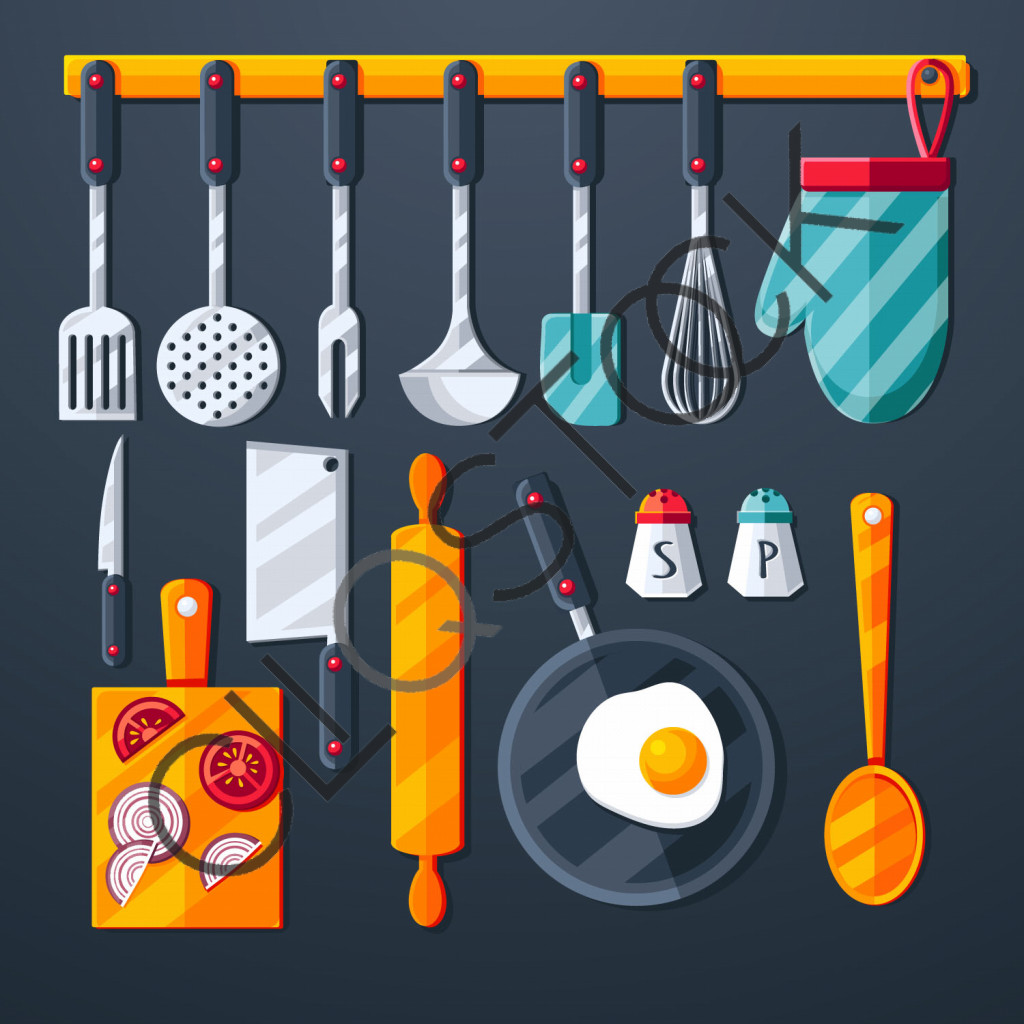

In [ ]:
# url = 'https://cdn.cliqstock.com/assets/contributor/watermark/2022/07/21/62d9043dc84891658389565.jpg'
# url = "https://cdn.cliqstock.com/assets/contributor/watermark/2021/11/16/619348b6bd01c1637042358.jpg"
url = 'https://cdn.cliqstock.com/assets/contributor/watermark/2022/04/10/6252d8aa72b9d1649596586.jpg'
url = 'https://cdn.cliqstock.com/assets/contributor/watermark/2022/05/24/628c7ac8685361653373640.jpg'

response = requests.get(url)
url_img = Image.open(BytesIO(response.content))
img = np.array(url_img)
test=extract_features(img_array=img)
print('USER INPUTTED QUERY:')
url_img

In [ ]:
list_similar_photo=t.get_nns_by_vector(test,10,include_distances=True)
# print(list_similar_photo)

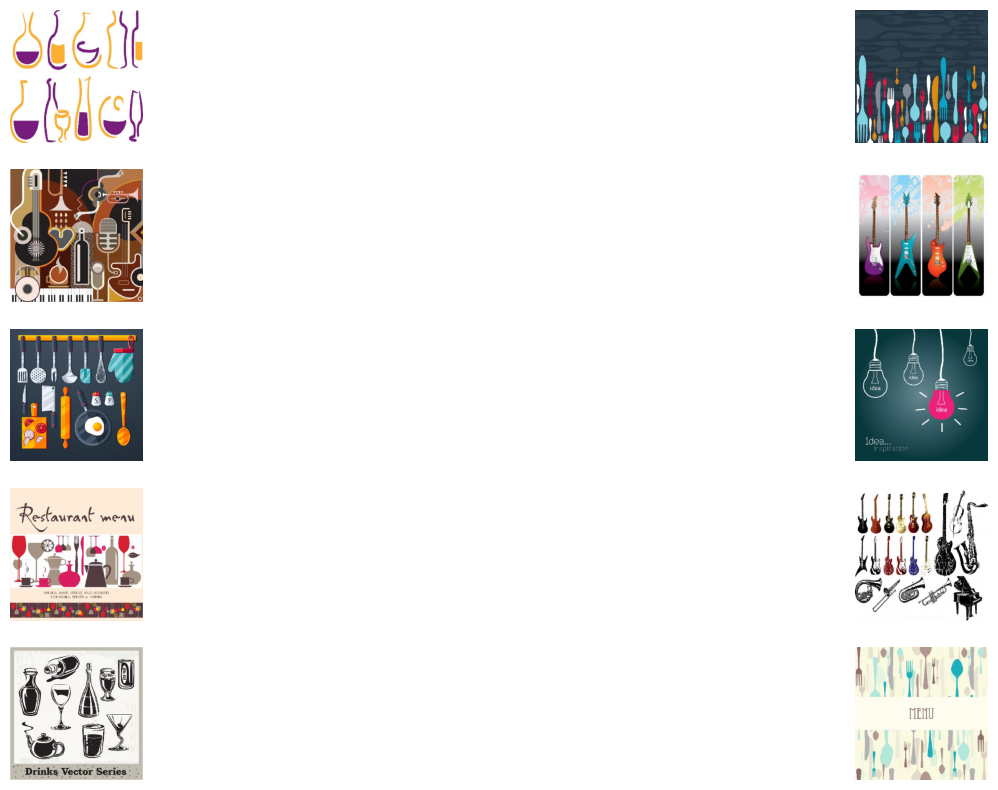

In [ ]:
files_list=os.listdir(base_images)
x=0
plt.figure(figsize=(20,10))
for  i in range(len(files_list)):
  if i in list_similar_photo[0]:
    plt.subplot(5,2,x+1)
    path = base_images + files_list[i]
    image_array=image.load_img(path,target_size=(320,320))
    plt.imshow(image_array)
    plt.axis('off')
    x=x+1
plt.show()